In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Walmart.csv')

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
df.shape

(6435, 8)

In [11]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [17]:
df = df.sort_values("Date")

In [19]:
# Encode Store ID
le = LabelEncoder()
df["Store"] = le.fit_transform(df["Store"])

X = df.drop(["Weekly_Sales", "Date"], axis=1)
y = df["Weekly_Sales"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("\nLinear Regression")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))


Linear Regression
MAE: 421890.76274909277
RMSE: 513191.60755515576


In [22]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("\nRandom Forest")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))


Random Forest
MAE: 105883.99455072582
RMSE: 191131.3090990322


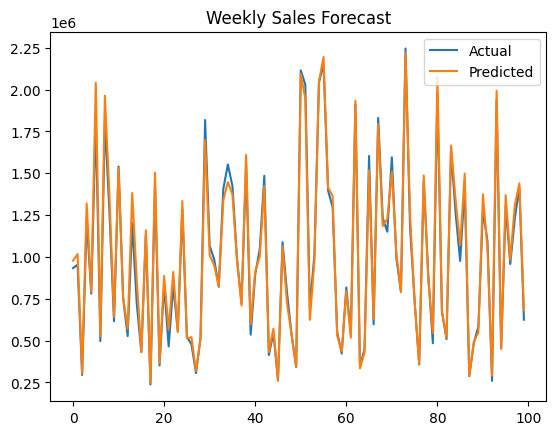

In [23]:
plt.figure()
plt.plot(y_test.values[:100], label="Actual")
plt.plot(rf_preds[:100], label="Predicted")
plt.title("Weekly Sales Forecast")
plt.legend()
plt.show()

In [24]:
# Store-wise forecasting example

store_id = df["Store"].unique()[0]   # pick one store
store_data = df[df["Store"] == store_id]

X_store = store_data.drop(["Weekly_Sales", "Date"], axis=1)
y_store = store_data["Weekly_Sales"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_store, y_store, test_size=0.2, shuffle=False
)

rf_store = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf_store.fit(X_train_s, y_train_s)
store_preds = rf_store.predict(X_test_s)

print(f"Store {store_id} MAE:",
      mean_absolute_error(y_test_s, store_preds))


Store 36 MAE: 16715.456067268882


In [25]:
# Predict next 4 weeks sales (future forecast)

last_known = X.tail(4)
future_predictions = rf.predict(last_known)

print("Next 4 weeks sales forecast:")
for i, val in enumerate(future_predictions, 1):
    print(f"Week {i}: {int(val)}")


Next 4 weeks sales forecast:
Week 1: 905784
Week 2: 259385
Week 3: 1058923
Week 4: 2457018


In [26]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

df["Sales_Anomaly"] = iso.fit_predict(X)

anomalies = df[df["Sales_Anomaly"] == -1][
    ["Date", "Store", "Weekly_Sales"]
]

print("Anomalous Sales Weeks:")
print(anomalies.head())


Anomalous Sales Weeks:
            Date  Store  Weekly_Sales
1594  02-07-2010     11     951957.31
858   05-02-2010      6     496725.44
5317  06-08-2010     37     378574.44
1599  06-08-2010     11     967576.95
1279  07-09-2012      8     565812.29
